In [2]:
#Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Считывание данных и вывод структуры
data = pd.read_excel('kursach.xlsx')
display(data.head())
display(data.info())
display(data.shape)

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


None

(1001, 214)

In [4]:
"""
Видим, что есть ненужный столбец Unnamed0, есть столбцы представленные преимущественно нулями. Столбцы имеют разный масштаб. Учтем это при дальнейшей
обработке.
"""

'\nВидим, что есть ненужный столбец Unnamed0, есть столбцы представленные преимущественно нулями. Столбцы имеют разный масштаб. Учтем это при дальнейшей\nобработке.\n'

In [5]:
#Удалим unnamed:0
data = data.drop(columns=['Unnamed: 0'])

In [6]:
#Посмотрим, есть ли дубликаты в данных
data.duplicated().sum()

np.int64(32)

In [7]:
#Удалим полные дубликаты
data = data.drop_duplicates()

In [8]:
#Посмотрим, сколько есть пропусков
data.isnull().sum().sum()

np.int64(36)

In [9]:
#Посмотрим на пропуски
losses = data[data.isnull().any(axis=1)]
los = losses.apply(lambda r: r[r.isnull()],axis = 1)
los

,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
'''
Видим, что пропущены значения в 12 столбцах для 3 соединений. С учетом малого количества стро с пропусками 3 из 969 и чтобы не вносить шум в модель
удалим строки, где есть пропуски.
'''
data = data.dropna(axis=0)

In [11]:
#Выполним анализ целевых переменных
data[['IC50, mM', 'CC50, mM', 'SI']].describe()

,"IC50, mM","CC50, mM",SI
count,966.000000,966.000000,966.000000
mean,218.977503,583.888333,74.118298
std,395.411527,632.692383,696.637078
min,0.003517,0.700808,0.011489
25%,12.491340,99.999121,1.494403
50%,45.222783,422.158836,3.913351
75%,225.226967,886.389271,16.332455
max,4128.529377,4538.976189,15620.600000


In [12]:
#На всякий случай пересчитаем SI, чтобы убедиться что в нем нет ошибок
data['SI'] = data['CC50, mM']/data['IC50, mM']

<Axes: xlabel='SI', ylabel='Count'>

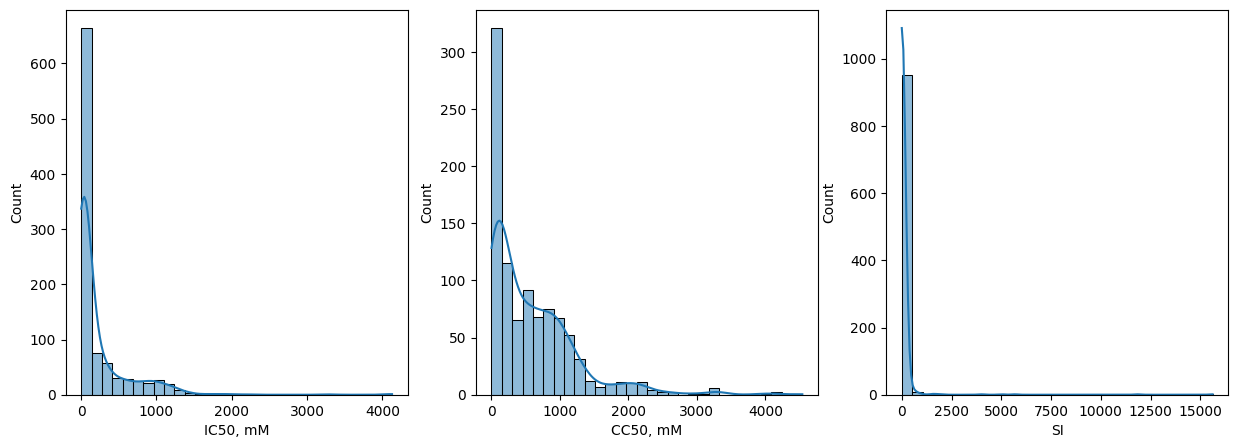

In [13]:
#Визуализируем распределения целевых переменных
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(data['IC50, mM'], bins=30, ax=axes[0], kde=True)
sns.histplot(data['CC50, mM'], bins=30, ax=axes[1], kde=True)
sns.histplot(data['SI'], bins=30, ax=axes[2], kde=True)

<Axes: ylabel='SI'>

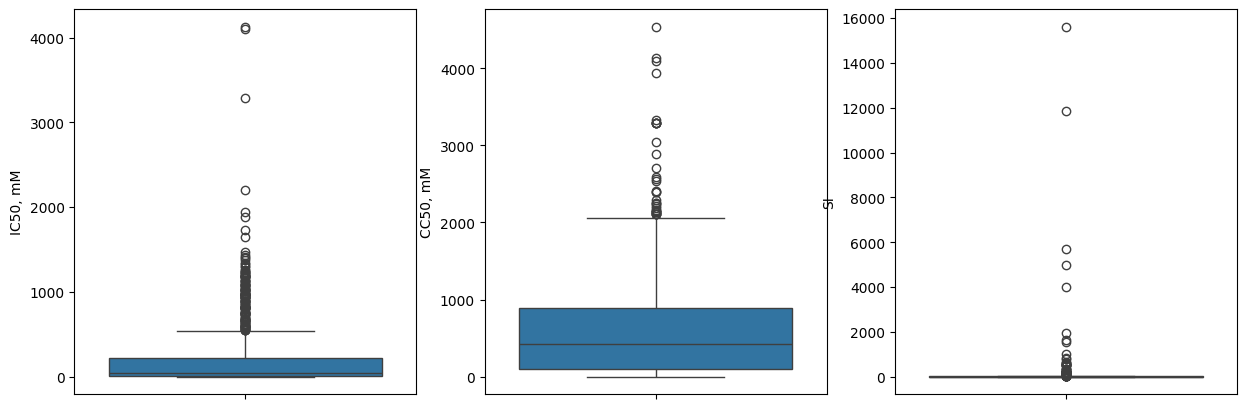

In [14]:
#Визуализируем боксплоты целевых переменных
fig, axes = plt.subplots(1,3,figsize=(15,5))
sns.boxplot(data['IC50, mM'], ax=axes[0])
sns.boxplot(data['CC50, mM'], ax=axes[1])
sns.boxplot(data['SI'], ax=axes[2])

In [15]:
'''
Видим, что есть потенциальные выбросы, однако без конкретных сведений о проведенных экспериментах тяжело сказать, являются ли указанные характеристики веществ
ошибочными, либо это действительно так. Уберем вещества с SI более 1000, чтобы избавиться от части выбросов, такие значения практически единичны.
'''
data = data[data['SI']<1000]

In [16]:
#Выполним анализ признаков
descript = data.describe()

#Выделим признаки, которые не изменяются
a = descript.loc['std',:][descript.loc['std',:]<0.01]
a

NumRadicalElectrons    0.0
SMR_VSA8               0.0
SlogP_VSA9             0.0
fr_N_O                 0.0
fr_SH                  0.0
fr_azide               0.0
fr_barbitur            0.0
fr_benzodiazepine      0.0
fr_diazo               0.0
fr_dihydropyridine     0.0
fr_isocyan             0.0
fr_isothiocyan         0.0
fr_lactam              0.0
fr_nitroso             0.0
fr_phos_acid           0.0
fr_phos_ester          0.0
fr_prisulfonamd        0.0
fr_thiocyan            0.0
Name: std, dtype: float64

In [17]:
#Удалим константные признаки, т.к. они не несут в себе полезной информации
data = data.drop(columns = list(a.index))

In [18]:
#Разделим признаки на группы и проанализируем отдельно каждую группу

general_physchem_descriptors = [
    'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons',
    'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge',
    'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'FractionCSP3',
    'NHOHCount', 'NOCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms',
    'NumRotatableBonds', 'MolLogP', 'MolMR', 'TPSA'
]
electronic_descriptors = [
    'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex'
]
topological_descriptors = [
    'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI',
    'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ',
    'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n',
    'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc',
    'Kappa1', 'Kappa2', 'Kappa3'
]
surface_volume_descriptors = [
    'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12',
    'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4',
    'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9',
    'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5',
    'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10',
    'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4',
    'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'EState_VSA1',
    'EState_VSA10', 'EState_VSA11', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4',
    'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9',
    'VSA_EState1', 'VSA_EState10', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4',
    'VSA_EState5', 'VSA_EState6', 'VSA_EState7', 'VSA_EState8', 'VSA_EState9'
]
quantitative_structural_descriptors = [
    'HeavyAtomCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles',
    'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles',
    'NumAromaticRings', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles',
    'NumSaturatedRings', 'RingCount'
]
fragment_descriptors = [
    'fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_ArN', 'fr_Ar_COO', 'fr_Ar_N',
    'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO', 'fr_C_S',
    'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_Ndealkylation1',
    'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_aldehyde', 'fr_alkyl_carbamate',
    'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amide', 'fr_amidine', 'fr_aniline',
    'fr_aryl_methyl', 'fr_azo', 'fr_benzene', 'fr_bicyclic', 'fr_epoxide',
    'fr_ester', 'fr_ether', 'fr_furan', 'fr_guanido', 'fr_halogen', 'fr_hdrzine',
    'fr_hdrzone', 'fr_imidazole', 'fr_imide', 'fr_ketone', 'fr_ketone_Topliss',
    'fr_lactone', 'fr_methoxy', 'fr_morpholine', 'fr_nitrile', 'fr_nitro',
    'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_oxazole', 'fr_oxime',
    'fr_para_hydroxylation', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_piperdine',
    'fr_piperzine', 'fr_priamide', 'fr_pyridine', 'fr_quatN', 'fr_sulfide',
    'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole',
    'fr_thiazole', 'fr_thiophene', 'fr_unbrch_alkane', 'fr_urea'
]
#Выделим отдельные датафреймы для каждой группы признаков
general_des = data.loc[:, general_physchem_descriptors]
el_des = data.loc[:, electronic_descriptors]
top_des = data.loc[:, topological_descriptors]
surf_des = data.loc[:, surface_volume_descriptors]
quant_des = data.loc[:, quantitative_structural_descriptors]
frag_des = data.loc[:, fragment_descriptors]


Высококореллированные признаки: ['HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan2', 'FpDensityMorgan3', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'MolMR', 'TPSA']


<Axes: >

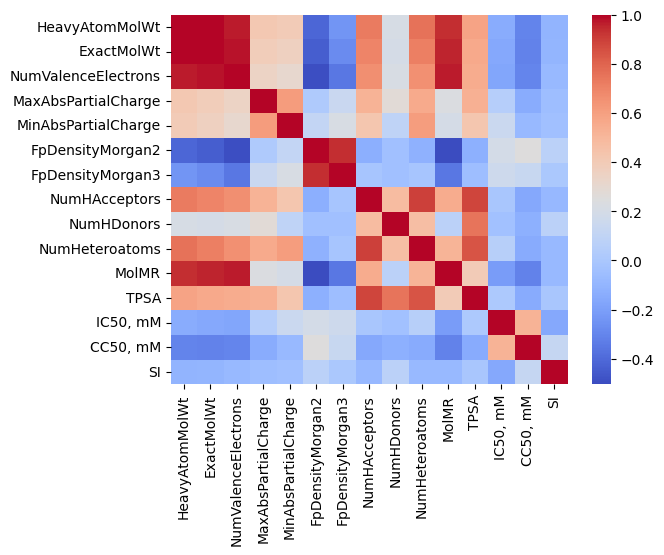

In [19]:
#Проведем анализ корреляций в каждой группе
corr_mat = general_des.corr()
upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
high_corr = [col for col in upper.columns if any(upper[col].abs()>0.9)]
print(f'Высококореллированные признаки: {high_corr}')
high_corr.extend(['IC50, mM','CC50, mM','SI'])
gen_df = data.loc[:,high_corr]
gen_corr = gen_df.corr()
sns.heatmap(gen_corr, cmap = 'coolwarm')

In [20]:
#Видим, что ни у одного признака нет очень высокой корреляции с целевыми признаками. Удалим высококореллированные признаки, чтобы избежать мультиколлинеарности

data = data.drop(columns = ['HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'MolMR'])

<Axes: >

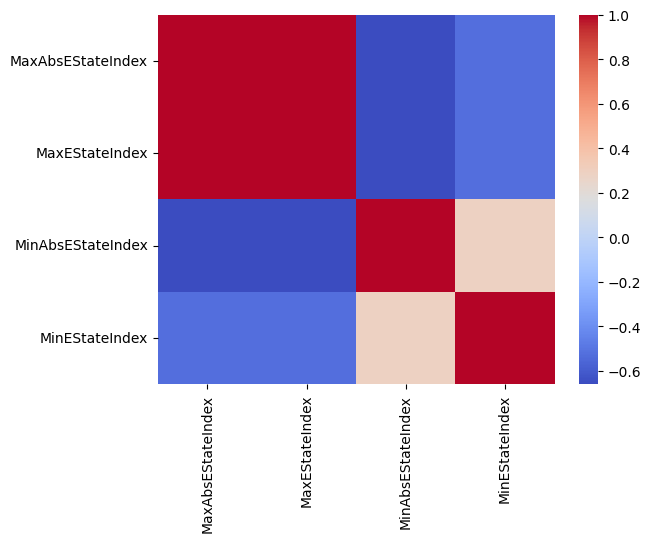

In [21]:
#Проведем анализ корреляций во второй группе
corr_mat = el_des.corr()
sns.heatmap(corr_mat, cmap = 'coolwarm')

In [22]:
#Удалим высококореллированный признак
data = data.drop('MaxAbsEStateIndex', axis = 1)

Высококореллированные признаки: ['Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Kappa1', 'Kappa2', 'Kappa3']


<Axes: >

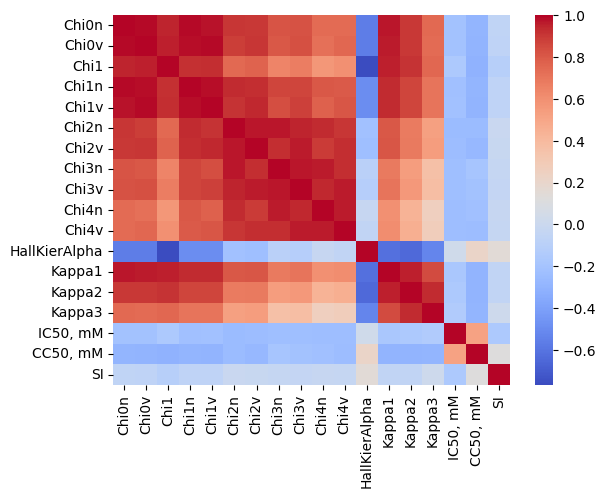

In [23]:
#Проведем анализ корреляций в третьей группе
corr_mat = top_des.corr()
upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
high_corr = [col for col in upper.columns if any(upper[col].abs()>0.9)]
print(f'Высококореллированные признаки: {high_corr}')
high_corr.extend(['IC50, mM','CC50, mM','SI'])
gen_df = data.loc[:,high_corr]
gen_corr = gen_df.corr()
sns.heatmap(gen_corr, cmap = 'coolwarm')

In [24]:
#Удалим высококореллированные признаки
data = data.drop(columns = ['Chi0n', 'Chi0v', 'Chi1n', 'Chi1v','Chi2n', 'Chi3n', 'Chi4n', 'Kappa1'])

Высококореллированные признаки: ['SlogP_VSA11', 'SlogP_VSA6', 'VSA_EState6']


<Axes: >

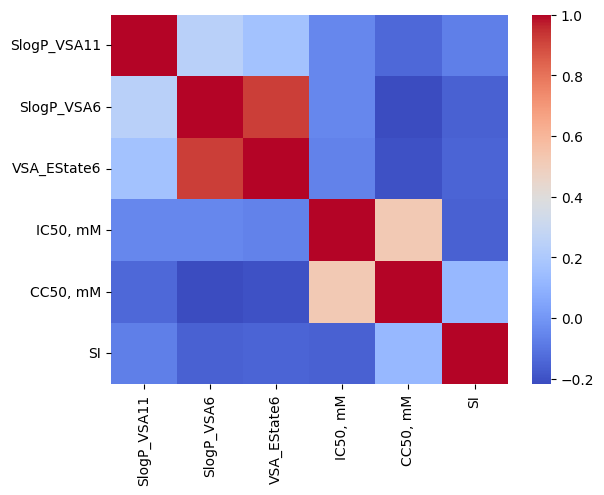

In [25]:
#Проведем анализ корреляций в четвертой группе
corr_mat = surf_des.corr()
upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
high_corr = [col for col in upper.columns if any(upper[col].abs()>0.9)]
print(f'Высококореллированные признаки: {high_corr}')
high_corr.extend(['IC50, mM','CC50, mM','SI'])
gen_df = data.loc[:,high_corr]
gen_corr = gen_df.corr()
sns.heatmap(gen_corr, cmap = 'coolwarm')

In [26]:
#Удалим высококореллированные признаки
data = data.drop(columns = ['SlogP_VSA11','SlogP_VSA6'])

Высококореллированные признаки: ['NumSaturatedCarbocycles']


<Axes: >

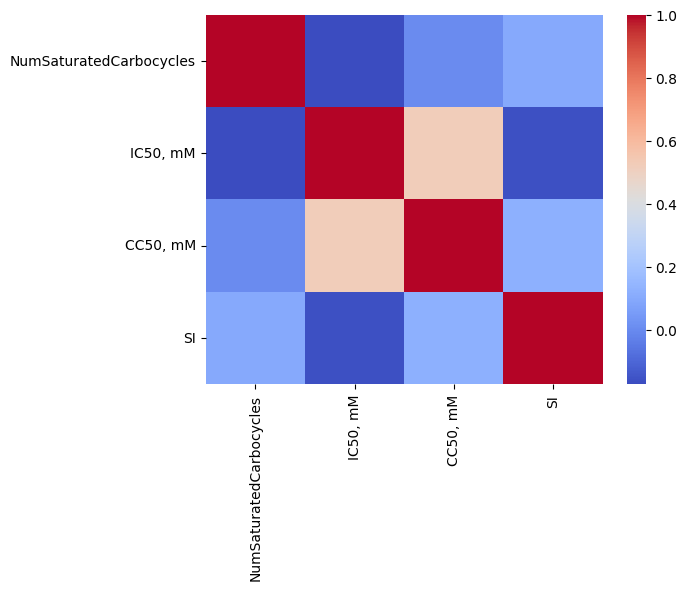

In [27]:
#Проведем анализ корреляций в пятой группе
corr_mat = quant_des.corr()
upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
high_corr = [col for col in upper.columns if any(upper[col].abs()>0.9)]
print(f'Высококореллированные признаки: {high_corr}')
high_corr.extend(['IC50, mM','CC50, mM','SI'])
gen_df = data.loc[:,high_corr]
gen_corr = gen_df.corr()
sns.heatmap(gen_corr, cmap = 'coolwarm')

In [28]:
#Удалим высококореллированные признаки
data = data.drop(columns = ['NumSaturatedCarbocycles'])

Высококореллированные признаки: ['fr_Al_OH_noTert', 'fr_COO', 'fr_COO2', 'fr_C_O_noCOO', 'fr_Nhpyrrole', 'fr_nitro_arom_nonortho', 'fr_phenol', 'fr_phenol_noOrthoHbond']


<Axes: >

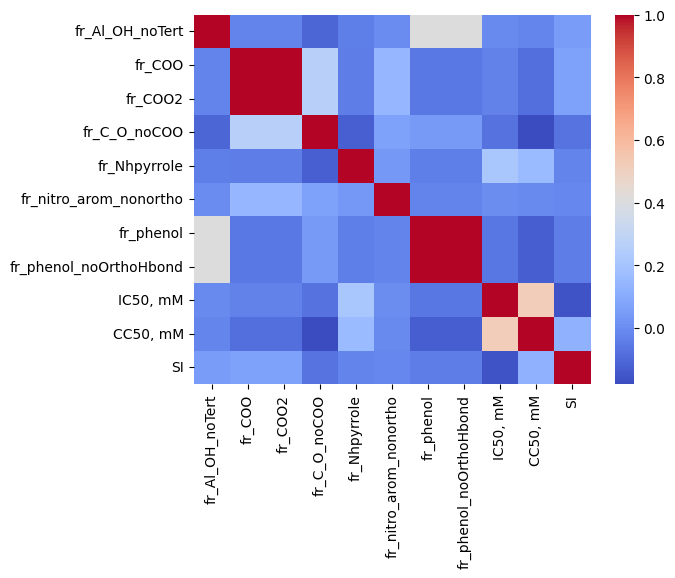

In [29]:
#Проведем анализ корреляций в шестой группе
corr_mat = frag_des.corr()
upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
high_corr = [col for col in upper.columns if any(upper[col].abs()>0.9)]
print(f'Высококореллированные признаки: {high_corr}')
high_corr.extend(['IC50, mM','CC50, mM','SI'])
gen_df = data.loc[:,high_corr]
gen_corr = gen_df.corr()
sns.heatmap(gen_corr, cmap = 'coolwarm')

In [30]:
#Удалим высококореллированные признаки
data = data.drop(columns = ['fr_Al_OH_noTert', 'fr_COO2', 'fr_phenol_noOrthoHbond'])

In [31]:
#После всех преобразований сохраним итоговый датасет
data = data.reset_index(drop=True)
data.to_csv('data_eda.csv', index = False)